Análisis 1D --- Graficos de comparación univariada
===

* 60:00 min | Última modificación: Abril 5, 2021 | [YouTube]()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## pie()

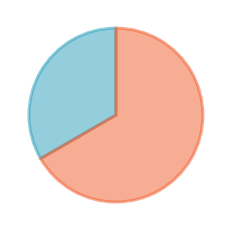

In [4]:
data = [15, 30]

plt.subplots()

colors = ['#2A9FBC', '#F15B2A']

wedges, texts = plt.pie(
    data,
    startangle=90,
    colors=colors,
    wedgeprops=dict(linewidth=3, alpha=0.5),
)

for i, w in enumerate(wedges):
    w.set_edgecolor(colors[i])

## pywaffle

In [5]:
!pip3 install --quiet pywaffle

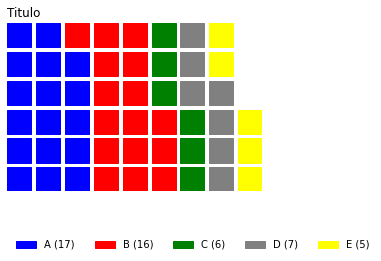

In [7]:
from pywaffle import Waffle

data = {'A': 17, 'B': 16, 'C': 6, 'D': 7, 'E': 5}

fig = plt.figure(
    FigureClass=Waffle,
    rows=6,
    values=data,
    colors=('blue', 'red', 'green', 'gray', 'yellow'), 
    title=dict(label='Titulo', loc='left'),
    labels=["{} ({})".format(k, v) for k, v in data.items()],
    legend=dict(loc='lower left', bbox_to_anchor=(0, -0.4), ncol=len(data), framealpha=0)
)

## Squarify

In [8]:
!pip3 install --quiet squarify

(0.0, 100.0, 0.0, 100.0)

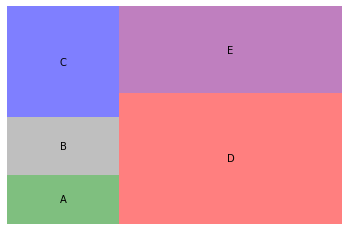

In [11]:
import squarify

data = [10, 12, 23, 54, 36]
labels = list("ABCDE")

squarify.plot(
    sizes=data,
    label=labels,
    color='green,grey,blue,red,purple'.split(','),
    alpha=0.5,
)
plt.axis("off")

## pandas.dataframe.bar()

In [60]:
df = pd.DataFrame(
    data={"valor": [220, -30, -50, -20, 150, -10]},
    index=list("ABCDEF"),
)

df.head()

,valor
A,220
B,-30
C,-50
D,-20
E,150


In [61]:
df['cumsum'] = df.valor.cumsum().shift(1).fillna(0)
df.head()

,valor,cumsum
A,220,0.0
B,-30,220.0
C,-50,190.0
D,-20,140.0
E,150,120.0


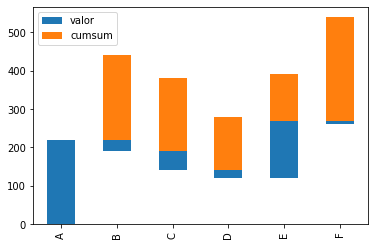

In [62]:
df.plot.bar(
    stacked=True,
    bottom=df['cumsum'],
)

In [63]:
cumsum = df.valor.cumsum().shift(1).fillna(0)

h_lines = cumsum.reset_index(drop=True).repeat(3).shift(-1)
h_lines[1::3] = np.nan
h_lines

0      0.0
0      NaN
0    220.0
1    220.0
1      NaN
1    190.0
2    190.0
2      NaN
2    140.0
3    140.0
3      NaN
3    120.0
4    120.0
4      NaN
4    270.0
5    270.0
5      NaN
5      NaN
Name: valor, dtype: float64

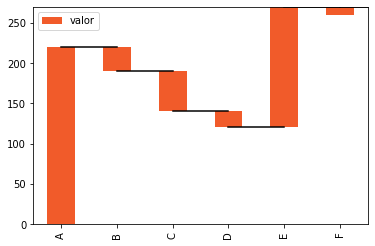

In [72]:
df['total'] = df.sum().valor
cumsum.loc['total'] = 0


fig = df[['valor']].plot.bar(
    stacked=True,
    bottom=df['cumsum'],
    color="#F15B2A",
) 

cumsum['total'] = df[:-1].sum().valor
h_lines = cumsum.reset_index(drop=True).repeat(3).shift(-1)
h_lines[1::3]=np.nan

fig.plot(h_lines.index, h_lines.values, 'black',)